In [1]:
import argparse
import hashlib

from queryvolution.src.common import KeywordExtractor, generate_known_queries, setup_logger
from queryvolution.src.email_extraction import split_df, extract_sent_mail_contents, extract_apache_ml

from queryvolution.src.query_generator import QueryResultExtractor, ObfuscatedResultExtractor, PaddedResultExtractor
from queryvolution.src.matchmaker import KeywordTrapdoorMatchmaker

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marcowindt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/marcowindt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
similar_voc_size = 2000
server_voc_size = 2000

query_set_size = int(0.15 * server_voc_size)

attack_dataset = "enron"

artificial_keyword_size = 1  # disables artificial kws

In [3]:
# Extract emails from a dataset
enron = extract_sent_mail_contents()
similar_docs, stored_docs = split_df(d_frame=enron, frac=0.4)

Reading the emails: 100%|██████████| 30109/30109 [00:18<00:00, 1627.39it/s]


In [4]:
## Extract keywords from similar dataset
similar_extractor = KeywordExtractor(
    corpus_df=similar_docs,
    voc_size=similar_voc_size,
    min_freq=1,
    with_artificial_kw_size=artificial_keyword_size
)

Extracting corpus vocabulary (Core 1):   0%|          | 0/3011 [00:00<?, ?it/s]

Extracting corpus vocabulary (Core 2):   0%|          | 0/3011 [00:00<?, ?it/s]


Extracting corpus vocabulary (Core 0):   0%|          | 6/3011 [00:00<01:37, 30.84it/s]

Extracting corpus vocabulary (Core 2):   0%|          | 3/3011 [00:00<02:08, 23.44it/s]


Extracting corpus vocabulary (Core 0):   0%|          | 14/3011 [00:00<01:22, 36.12it/s]

Extracting corpus vocabulary (Core 2):   0%|          | 6/3011 [00:00<02:05, 23.89it/s]


Extracting corpus vocabulary (Core 0):   1%|          | 19/3011 [00:00<01:20, 37.34it/s]

Extracting corpus vocabulary (Core 2):   0%|          | 13/3011 [00:00<01:41, 29.55it/s]


Extracting corpus vocabulary (Core 0):   1%|          | 22/3011 [00:00<01:28, 33.84it/s]

Extracting corpus vocabulary (Core 2):   1%|          | 17/3011 [00:00<01:35, 31.27it/s]


Extracting corpus vocabulary (Core 1):   1%|          | 26/3011 [00:00<01:46, 27.96it/s]

Extracting corpus vocabula

Extracting corpus vocabulary (Core 1):  11%|█         | 325/3011 [00:08<01:03, 42.39it/s]

Extracting corpus vocabulary (Core 2):  11%|█         | 322/3011 [00:08<00:47, 56.92it/s]


Extracting corpus vocabulary (Core 1):  11%|█         | 334/3011 [00:08<00:53, 50.11it/s]


Extracting corpus vocabulary (Core 0):  12%|█▏        | 347/3011 [00:09<01:11, 37.36it/s]

Extracting corpus vocabulary (Core 2):  11%|█         | 330/3011 [00:09<00:58, 45.95it/s]


Extracting corpus vocabulary (Core 0):  12%|█▏        | 352/3011 [00:09<01:07, 39.27it/s]

Extracting corpus vocabulary (Core 2):  11%|█         | 337/3011 [00:09<00:52, 51.19it/s]


Extracting corpus vocabulary (Core 3):  12%|█▏        | 366/3011 [00:09<00:43, 60.92it/s]

Extracting corpus vocabulary (Core 0):  12%|█▏        | 370/3011 [00:09<00:51, 51.13it/s]


Extracting corpus vocabulary (Core 1):  12%|█▏        | 361/3011 [00:09<00:56, 46.55it/s]

Extracting corpus vocabulary (Core 0):  13%|█▎        | 384/3011 [00:09<00:42, 61.87i

Extracting corpus vocabulary (Core 2):  25%|██▌       | 766/3011 [00:17<00:54, 40.87it/s]


Extracting corpus vocabulary (Core 0):  26%|██▌       | 769/3011 [00:17<01:37, 23.10it/s]

Extracting corpus vocabulary (Core 2):  26%|██▌       | 772/3011 [00:17<00:53, 41.83it/s]


Extracting corpus vocabulary (Core 1):  24%|██▍       | 730/3011 [00:17<01:42, 22.18it/s]

Extracting corpus vocabulary (Core 1):  24%|██▍       | 736/3011 [00:18<01:24, 26.80it/s]


Extracting corpus vocabulary (Core 3):  25%|██▍       | 743/3011 [00:17<01:12, 31.35it/s]

Extracting corpus vocabulary (Core 2):  26%|██▌       | 786/3011 [00:18<00:48, 45.49it/s]


Extracting corpus vocabulary (Core 0):  26%|██▌       | 787/3011 [00:18<01:12, 30.51it/s]

Extracting corpus vocabulary (Core 1):  25%|██▍       | 741/3011 [00:18<01:27, 25.82it/s]


Extracting corpus vocabulary (Core 0):  26%|██▋       | 792/3011 [00:18<01:05, 33.95it/s]

Extracting corpus vocabulary (Core 1):  25%|██▍       | 749/3011 [00:18<01:11, 31.80i

Extracting corpus vocabulary (Core 2):  39%|███▊      | 1166/3011 [00:25<00:30, 61.36it/s]


Extracting corpus vocabulary (Core 0):  39%|███▉      | 1174/3011 [00:26<00:34, 52.70it/s]


Extracting corpus vocabulary (Core 0):  39%|███▉      | 1182/3011 [00:26<00:32, 55.68it/s]


Extracting corpus vocabulary (Core 3):  37%|███▋      | 1104/3011 [00:26<00:38, 49.31it/s]

Extracting corpus vocabulary (Core 0):  40%|███▉      | 1192/3011 [00:26<00:28, 63.14it/s]


Extracting corpus vocabulary (Core 1):  40%|███▉      | 1191/3011 [00:26<00:40, 45.24it/s]

Extracting corpus vocabulary (Core 2):  39%|███▉      | 1179/3011 [00:26<00:45, 40.47it/s]


Extracting corpus vocabulary (Core 0):  40%|████      | 1208/3011 [00:26<00:27, 64.69it/s]

Extracting corpus vocabulary (Core 0):  40%|████      | 1215/3011 [00:26<00:29, 60.27it/s]

Extracting corpus vocabulary (Core 2):  40%|███▉      | 1197/3011 [00:26<00:35, 51.65it/s]


Extracting corpus vocabulary (Core 1):  40%|████      | 1210/3011 [00:26<0

Extracting corpus vocabulary (Core 0):  52%|█████▏    | 1567/3011 [00:33<00:25, 56.55it/s]

Extracting corpus vocabulary (Core 2):  51%|█████▏    | 1544/3011 [00:33<00:31, 46.93it/s]


Extracting corpus vocabulary (Core 0):  52%|█████▏    | 1573/3011 [00:33<00:26, 54.81it/s]

Extracting corpus vocabulary (Core 2):  51%|█████▏    | 1550/3011 [00:33<00:33, 44.13it/s]


Extracting corpus vocabulary (Core 0):  52%|█████▏    | 1579/3011 [00:33<00:26, 53.46it/s]

Extracting corpus vocabulary (Core 1):  53%|█████▎    | 1602/3011 [00:33<00:31, 45.17it/s]


Extracting corpus vocabulary (Core 3):  51%|█████▏    | 1546/3011 [00:33<00:35, 41.48it/s]

Extracting corpus vocabulary (Core 1):  53%|█████▎    | 1608/3011 [00:34<00:31, 45.13it/s]

Extracting corpus vocabulary (Core 0):  53%|█████▎    | 1591/3011 [00:34<00:28, 49.15it/s]


Extracting corpus vocabulary (Core 3):  52%|█████▏    | 1551/3011 [00:34<00:39, 37.26it/s]


Extracting corpus vocabulary (Core 3):  52%|█████▏    | 1555/3011 [00:34<00

Extracting corpus vocabulary (Core 1):  64%|██████▍   | 1940/3011 [00:41<00:33, 32.22it/s]

Extracting corpus vocabulary (Core 0):  65%|██████▌   | 1969/3011 [00:42<00:24, 41.87it/s]

Extracting corpus vocabulary (Core 2):  63%|██████▎   | 1883/3011 [00:42<00:28, 39.04it/s]


Extracting corpus vocabulary (Core 0):  66%|██████▌   | 1975/3011 [00:42<00:23, 44.51it/s]

Extracting corpus vocabulary (Core 1):  65%|██████▍   | 1956/3011 [00:42<00:27, 38.05it/s]


Extracting corpus vocabulary (Core 3):  63%|██████▎   | 1886/3011 [00:42<00:40, 28.08it/s]

Extracting corpus vocabulary (Core 1):  65%|██████▌   | 1962/3011 [00:42<00:25, 41.17it/s]

Extracting corpus vocabulary (Core 2):  64%|██████▎   | 1912/3011 [00:42<00:18, 58.17it/s]


Extracting corpus vocabulary (Core 0):  66%|██████▌   | 1992/3011 [00:42<00:20, 48.90it/s]


Extracting corpus vocabulary (Core 0):  66%|██████▋   | 1998/3011 [00:42<00:22, 45.76it/s]


Extracting corpus vocabulary (Core 3):  63%|██████▎   | 1899/3011 [00:42<00

Extracting corpus vocabulary (Core 0):  79%|███████▉  | 2379/3011 [00:51<00:17, 36.80it/s]


Extracting corpus vocabulary (Core 3):  73%|███████▎  | 2194/3011 [00:51<00:46, 17.40it/s]

Extracting corpus vocabulary (Core 0):  79%|███████▉  | 2385/3011 [00:51<00:19, 31.99it/s]


Extracting corpus vocabulary (Core 1):  76%|███████▌  | 2279/3011 [00:51<00:26, 27.20it/s]

Extracting corpus vocabulary (Core 0):  79%|███████▉  | 2390/3011 [00:51<00:18, 33.34it/s]


Extracting corpus vocabulary (Core 3):  73%|███████▎  | 2204/3011 [00:51<00:38, 21.18it/s]

Extracting corpus vocabulary (Core 0):  80%|███████▉  | 2395/3011 [00:51<00:20, 30.57it/s]

Extracting corpus vocabulary (Core 1):  76%|███████▌  | 2288/3011 [00:51<00:24, 29.75it/s]


Extracting corpus vocabulary (Core 0):  80%|███████▉  | 2401/3011 [00:52<00:17, 34.03it/s]

Extracting corpus vocabulary (Core 0):  80%|███████▉  | 2405/3011 [00:52<00:17, 34.97it/s]


Extracting corpus vocabulary (Core 1):  76%|███████▌  | 2292/3011 [00:52<00

Extracting corpus vocabulary (Core 1):  90%|████████▉ | 2709/3011 [00:59<00:06, 44.17it/s]


Extracting corpus vocabulary (Core 1):  90%|█████████ | 2716/3011 [00:59<00:06, 49.04it/s]

Extracting corpus vocabulary (Core 2):  88%|████████▊ | 2644/3011 [00:59<00:11, 31.66it/s]


Extracting corpus vocabulary (Core 1):  90%|█████████ | 2722/3011 [01:00<00:06, 47.56it/s]

Extracting corpus vocabulary (Core 0):  93%|█████████▎| 2812/3011 [01:00<00:04, 46.41it/s]


Extracting corpus vocabulary (Core 1):  91%|█████████ | 2728/3011 [01:00<00:05, 49.88it/s]

Extracting corpus vocabulary (Core 0):  94%|█████████▎| 2818/3011 [01:00<00:03, 48.52it/s]

Extracting corpus vocabulary (Core 1):  91%|█████████ | 2734/3011 [01:00<00:05, 46.93it/s]


Extracting corpus vocabulary (Core 0):  94%|█████████▍| 2824/3011 [01:00<00:04, 44.98it/s]

Extracting corpus vocabulary (Core 1):  91%|█████████ | 2739/3011 [01:00<00:06, 43.55it/s]


Extracting corpus vocabulary (Core 1):  91%|█████████ | 2746/3011 [01:00<00

In [5]:
# Extract keywords from real dataset
real_extractor = QueryResultExtractor(
    stored_docs,
    server_voc_size,
    min_freq=1,
    with_artificial_kw_size=artificial_keyword_size
)

Extracting corpus vocabulary (Core 1):   0%|          | 0/4516 [00:00<?, ?it/s]

Extracting corpus vocabulary (Core 1):   0%|          | 12/4516 [00:00<00:41, 108.86it/s]


Extracting corpus vocabulary (Core 1):   0%|          | 16/4516 [00:00<01:05, 69.09it/s] 

Extracting corpus vocabulary (Core 2):   0%|          | 3/4516 [00:00<03:50, 19.55it/s]


Extracting corpus vocabulary (Core 0):   0%|          | 14/4517 [00:00<01:32, 48.75it/s][A

Extracting corpus vocabulary (Core 2):   0%|          | 5/4516 [00:00<03:52, 19.43it/s]


Extracting corpus vocabulary (Core 1):   0%|          | 20/4516 [00:00<02:04, 36.01it/s]

Extracting corpus vocabulary (Core 2):   0%|          | 12/4516 [00:00<03:12, 23.40it/s]


Extracting corpus vocabulary (Core 1):   1%|          | 26/4516 [00:00<01:55, 38.72it/s]

Extracting corpus vocabulary (Core 2):   0%|          | 16/4516 [00:00<02:53, 25.94it/s]


Extracting corpus vocabulary (Core 1):   1%|          | 34/4516 [00:00<01:42, 43.89it/s]

Extracting c

Extracting corpus vocabulary (Core 3):   7%|▋         | 337/4516 [00:07<01:37, 42.97it/s]

Extracting corpus vocabulary (Core 0):  10%|█         | 471/4517 [00:08<01:16, 52.70it/s]

Extracting corpus vocabulary (Core 0):  11%|█         | 482/4517 [00:08<01:05, 61.61it/s]

Extracting corpus vocabulary (Core 0):  11%|█         | 495/4517 [00:08<00:56, 70.92it/s]


Extracting corpus vocabulary (Core 1):   9%|▉         | 397/4516 [00:08<01:39, 41.47it/s]

Extracting corpus vocabulary (Core 0):  11%|█         | 504/4517 [00:08<00:55, 71.79it/s]


Extracting corpus vocabulary (Core 0):  11%|█▏        | 512/4517 [00:08<01:09, 57.39it/s]


Extracting corpus vocabulary (Core 3):   8%|▊         | 356/4516 [00:08<02:18, 29.97it/s]

Extracting corpus vocabulary (Core 0):  11%|█▏        | 519/4517 [00:08<01:15, 53.03it/s]


Extracting corpus vocabulary (Core 3):   8%|▊         | 361/4516 [00:08<02:11, 31.54it/s]

Extracting corpus vocabulary (Core 1):   9%|▉         | 406/4516 [00:09<03:17, 20.83it

Extracting corpus vocabulary (Core 0):  24%|██▍       | 1104/4517 [00:17<00:43, 78.59it/s][A


Extracting corpus vocabulary (Core 3):  14%|█▍        | 631/4516 [00:17<01:27, 44.25it/s]

Extracting corpus vocabulary (Core 2):  18%|█▊        | 801/4516 [00:17<01:09, 53.18it/s]


Extracting corpus vocabulary (Core 0):  25%|██▍       | 1113/4517 [00:17<00:51, 66.63it/s][A

Extracting corpus vocabulary (Core 2):  18%|█▊        | 807/4516 [00:17<01:09, 53.54it/s]


Extracting corpus vocabulary (Core 1):  16%|█▋        | 744/4516 [00:17<01:02, 60.33it/s]


Extracting corpus vocabulary (Core 0):  25%|██▍       | 1129/4517 [00:17<00:50, 66.72it/s][A


Extracting corpus vocabulary (Core 3):  15%|█▌        | 692/4516 [00:17<00:45, 83.70it/s]

Extracting corpus vocabulary (Core 0):  25%|██▌       | 1142/4517 [00:17<00:43, 76.99it/s][A


Extracting corpus vocabulary (Core 3):  16%|█▌        | 705/4516 [00:17<00:40, 93.52it/s]

Extracting corpus vocabulary (Core 0):  25%|██▌       | 1151/4517 [00:17

Extracting corpus vocabulary (Core 1):  27%|██▋       | 1201/4516 [00:24<00:54, 60.66it/s]


Extracting corpus vocabulary (Core 3):  28%|██▊       | 1271/4516 [00:24<01:06, 48.76it/s]

Extracting corpus vocabulary (Core 0):  36%|███▋      | 1640/4517 [00:25<01:12, 39.66it/s]

Extracting corpus vocabulary (Core 1):  27%|██▋       | 1226/4516 [00:25<00:44, 74.21it/s]


Extracting corpus vocabulary (Core 3):  28%|██▊       | 1277/4516 [00:25<01:24, 38.52it/s]


Extracting corpus vocabulary (Core 0):  37%|███▋      | 1654/4517 [00:25<01:00, 47.27it/s]

Extracting corpus vocabulary (Core 1):  28%|██▊       | 1247/4516 [00:25<00:45, 71.63it/s]

Extracting corpus vocabulary (Core 0):  37%|███▋      | 1660/4517 [00:25<01:06, 42.74it/s]


Extracting corpus vocabulary (Core 1):  28%|██▊       | 1256/4516 [00:25<00:47, 68.17it/s]

Extracting corpus vocabulary (Core 0):  37%|███▋      | 1665/4517 [00:25<01:08, 41.89it/s]


Extracting corpus vocabulary (Core 1):  28%|██▊       | 1267/4516 [00:25<00

Extracting corpus vocabulary (Core 1):  38%|███▊      | 1710/4516 [00:33<00:32, 85.57it/s]


Extracting corpus vocabulary (Core 3):  41%|████      | 1845/4516 [00:33<00:15, 167.28it/s]

Extracting corpus vocabulary (Core 1):  38%|███▊      | 1724/4516 [00:33<00:29, 95.88it/s]


Extracting corpus vocabulary (Core 3):  42%|████▏     | 1879/4516 [00:33<00:13, 196.02it/s]

Extracting corpus vocabulary (Core 1):  39%|███▊      | 1745/4516 [00:33<00:24, 114.42it/s]


Extracting corpus vocabulary (Core 3):  42%|████▏     | 1908/4516 [00:33<00:12, 216.58it/s]

Extracting corpus vocabulary (Core 1):  39%|███▉      | 1759/4516 [00:33<00:26, 104.98it/s]


Extracting corpus vocabulary (Core 3):  43%|████▎     | 1933/4516 [00:33<00:14, 181.85it/s]

Extracting corpus vocabulary (Core 0):  44%|████▍     | 1981/4517 [00:34<00:45, 55.61it/s]]

Extracting corpus vocabulary (Core 2):  35%|███▌      | 1597/4516 [00:33<00:48, 60.37it/s]


Extracting corpus vocabulary (Core 0):  44%|████▍     | 1988/4517 [0

Extracting corpus vocabulary (Core 0):  51%|█████     | 2291/4517 [00:42<01:34, 23.65it/s]


Extracting corpus vocabulary (Core 3):  55%|█████▍    | 2463/4516 [00:41<00:19, 106.89it/s]

Extracting corpus vocabulary (Core 0):  51%|█████     | 2296/4517 [00:42<01:19, 28.00it/s]


Extracting corpus vocabulary (Core 3):  55%|█████▍    | 2478/4516 [00:41<00:17, 114.14it/s]

Extracting corpus vocabulary (Core 1):  50%|█████     | 2277/4516 [00:42<01:23, 26.83it/s]


Extracting corpus vocabulary (Core 3):  55%|█████▌    | 2500/4516 [00:42<00:15, 133.32it/s]

Extracting corpus vocabulary (Core 0):  51%|█████     | 2310/4517 [00:42<00:57, 38.62it/s]


Extracting corpus vocabulary (Core 0):  51%|█████▏    | 2316/4517 [00:42<01:11, 30.98it/s]


Extracting corpus vocabulary (Core 3):  56%|█████▌    | 2532/4516 [00:42<00:18, 110.02it/s]

Extracting corpus vocabulary (Core 0):  51%|█████▏    | 2321/4517 [00:42<01:03, 34.57it/s]


Extracting corpus vocabulary (Core 3):  56%|█████▋    | 2545/4516 [00:

Extracting corpus vocabulary (Core 2):  52%|█████▏    | 2365/4516 [00:51<01:25, 25.12it/s]


Extracting corpus vocabulary (Core 0):  59%|█████▉    | 2671/4517 [00:52<00:59, 30.90it/s]

Extracting corpus vocabulary (Core 2):  52%|█████▏    | 2369/4516 [00:52<01:23, 25.77it/s]


Extracting corpus vocabulary (Core 1):  54%|█████▍    | 2452/4516 [00:52<00:55, 37.40it/s]

Extracting corpus vocabulary (Core 0):  59%|█████▉    | 2679/4517 [00:52<00:54, 33.75it/s]


Extracting corpus vocabulary (Core 3):  66%|██████▋   | 2997/4516 [00:52<00:51, 29.27it/s]

Extracting corpus vocabulary (Core 0):  59%|█████▉    | 2683/4517 [00:52<01:00, 30.50it/s]

Extracting corpus vocabulary (Core 1):  55%|█████▍    | 2463/4516 [00:52<00:57, 35.97it/s]


Extracting corpus vocabulary (Core 3):  66%|██████▋   | 3001/4516 [00:52<01:04, 23.52it/s]

Extracting corpus vocabulary (Core 1):  55%|█████▍    | 2468/4516 [00:52<00:54, 37.86it/s]


Extracting corpus vocabulary (Core 1):  55%|█████▍    | 2475/4516 [00:52<00

Extracting corpus vocabulary (Core 2):  62%|██████▏   | 2792/4516 [01:00<00:34, 49.46it/s]


Extracting corpus vocabulary (Core 0):  67%|██████▋   | 3019/4517 [01:00<00:34, 43.70it/s]

Extracting corpus vocabulary (Core 2):  62%|██████▏   | 2798/4516 [01:00<00:33, 51.78it/s]


Extracting corpus vocabulary (Core 0):  67%|██████▋   | 3025/4517 [01:00<00:33, 44.36it/s]

Extracting corpus vocabulary (Core 1):  64%|██████▍   | 2881/4516 [01:00<00:41, 39.66it/s]


Extracting corpus vocabulary (Core 0):  67%|██████▋   | 3030/4517 [01:00<00:38, 38.91it/s]

Extracting corpus vocabulary (Core 0):  67%|██████▋   | 3036/4517 [01:01<00:34, 42.68it/s]

Extracting corpus vocabulary (Core 1):  64%|██████▍   | 2903/4516 [01:01<00:31, 51.52it/s]


Extracting corpus vocabulary (Core 3):  73%|███████▎  | 3288/4516 [01:00<00:53, 22.75it/s]

Extracting corpus vocabulary (Core 1):  65%|██████▍   | 2915/4516 [01:01<00:26, 61.01it/s]


Extracting corpus vocabulary (Core 3):  73%|███████▎  | 3294/4516 [01:01<00

Extracting corpus vocabulary (Core 0):  74%|███████▍  | 3344/4517 [01:08<00:25, 45.36it/s]


Extracting corpus vocabulary (Core 1):  75%|███████▍  | 3382/4516 [01:08<00:16, 68.69it/s]

Extracting corpus vocabulary (Core 0):  74%|███████▍  | 3352/4517 [01:08<00:22, 51.79it/s]


Extracting corpus vocabulary (Core 0):  74%|███████▍  | 3359/4517 [01:08<00:22, 51.89it/s]

Extracting corpus vocabulary (Core 0):  75%|███████▍  | 3368/4517 [01:09<00:19, 59.33it/s]


Extracting corpus vocabulary (Core 3):  79%|███████▊  | 3546/4516 [01:08<00:27, 35.43it/s]

Extracting corpus vocabulary (Core 2):  73%|███████▎  | 3281/4516 [01:08<00:19, 64.79it/s]


Extracting corpus vocabulary (Core 0):  75%|███████▍  | 3375/4517 [01:09<00:22, 51.86it/s]

Extracting corpus vocabulary (Core 1):  75%|███████▌  | 3407/4516 [01:09<00:21, 52.35it/s]


Extracting corpus vocabulary (Core 1):  76%|███████▌  | 3414/4516 [01:09<00:19, 55.22it/s]

Extracting corpus vocabulary (Core 0):  75%|███████▍  | 3381/4517 [01:09<00

Extracting corpus vocabulary (Core 1):  84%|████████▍ | 3785/4516 [01:17<00:13, 54.41it/s]


Extracting corpus vocabulary (Core 3):  90%|█████████ | 4078/4516 [01:17<00:07, 56.40it/s]

Extracting corpus vocabulary (Core 0):  81%|████████  | 3656/4517 [01:17<00:29, 29.60it/s]


Extracting corpus vocabulary (Core 3):  91%|█████████ | 4088/4516 [01:17<00:07, 58.20it/s]

Extracting corpus vocabulary (Core 1):  84%|████████▍ | 3792/4516 [01:17<00:18, 38.98it/s]


Extracting corpus vocabulary (Core 3):  91%|█████████ | 4097/4516 [01:17<00:06, 60.88it/s]

Extracting corpus vocabulary (Core 1):  84%|████████▍ | 3798/4516 [01:17<00:17, 41.34it/s]


Extracting corpus vocabulary (Core 3):  91%|█████████ | 4105/4516 [01:17<00:06, 59.53it/s]

Extracting corpus vocabulary (Core 1):  84%|████████▍ | 3806/4516 [01:17<00:14, 47.68it/s]

Extracting corpus vocabulary (Core 2):  82%|████████▏ | 3692/4516 [01:17<00:16, 49.66it/s]


Extracting corpus vocabulary (Core 1):  84%|████████▍ | 3812/4516 [01:17<00

Extracting corpus vocabulary (Core 1):  91%|█████████▏| 4125/4516 [01:25<00:06, 58.05it/s]

Extracting corpus vocabulary (Core 2):  91%|█████████▏| 4123/4516 [01:25<00:03, 127.83it/s]


Extracting corpus vocabulary (Core 1):  91%|█████████▏| 4132/4516 [01:25<00:06, 56.43it/s]

Extracting corpus vocabulary (Core 2):  92%|█████████▏| 4138/4516 [01:25<00:02, 129.18it/s]


Extracting corpus vocabulary (Core 1):  92%|█████████▏| 4145/4516 [01:26<00:05, 67.71it/s]

Extracting corpus vocabulary (Core 2):  92%|█████████▏| 4158/4516 [01:26<00:02, 144.37it/s]


Extracting corpus vocabulary (Core 0):  87%|████████▋ | 3948/4517 [01:26<00:08, 63.82it/s]

Extracting corpus vocabulary (Core 0):  88%|████████▊ | 3958/4517 [01:26<00:08, 69.38it/s]

Extracting corpus vocabulary (Core 2):  93%|█████████▎| 4196/4516 [01:26<00:02, 149.28it/s]


Extracting corpus vocabulary (Core 0):  88%|████████▊ | 3969/4517 [01:26<00:07, 73.55it/s]


Extracting corpus vocabulary (Core 3):  98%|█████████▊| 4406/4516 [01:2

In [6]:
import matplotlib.pyplot as plt
import numpy as np

similar_keyword_counts = np.array([count for _kw, count in similar_extractor.sorted_voc_with_occ_original])
real_keyword_counts = np.array([count for _kw, count in real_extractor.sorted_voc_with_occ_original])

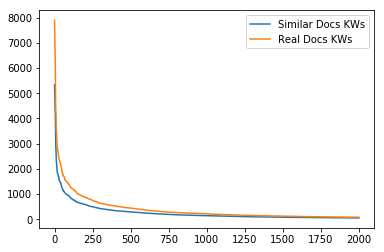

In [7]:
plt.plot(similar_keyword_counts, label="Similar Docs KWs")
plt.plot(real_keyword_counts, label="Real Docs KWs")
plt.legend()
plt.show()

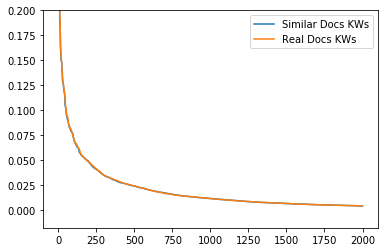

In [10]:
plt.plot(similar_keyword_counts / len(similar_docs), label="Similar Docs KWs")
plt.plot(real_keyword_counts/ len(stored_docs), label="Real Docs KWs")
plt.ylim(top=0.2)
plt.legend()
plt.show()

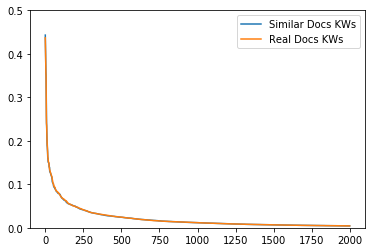

In [9]:
plt.plot(similar_keyword_counts / len(similar_docs), label="Similar Docs KWs")
plt.plot(real_keyword_counts/ len(stored_docs), label="Real Docs KWs")
plt.ylim(top=0.5, bottom=0.0)
plt.legend()
plt.show()

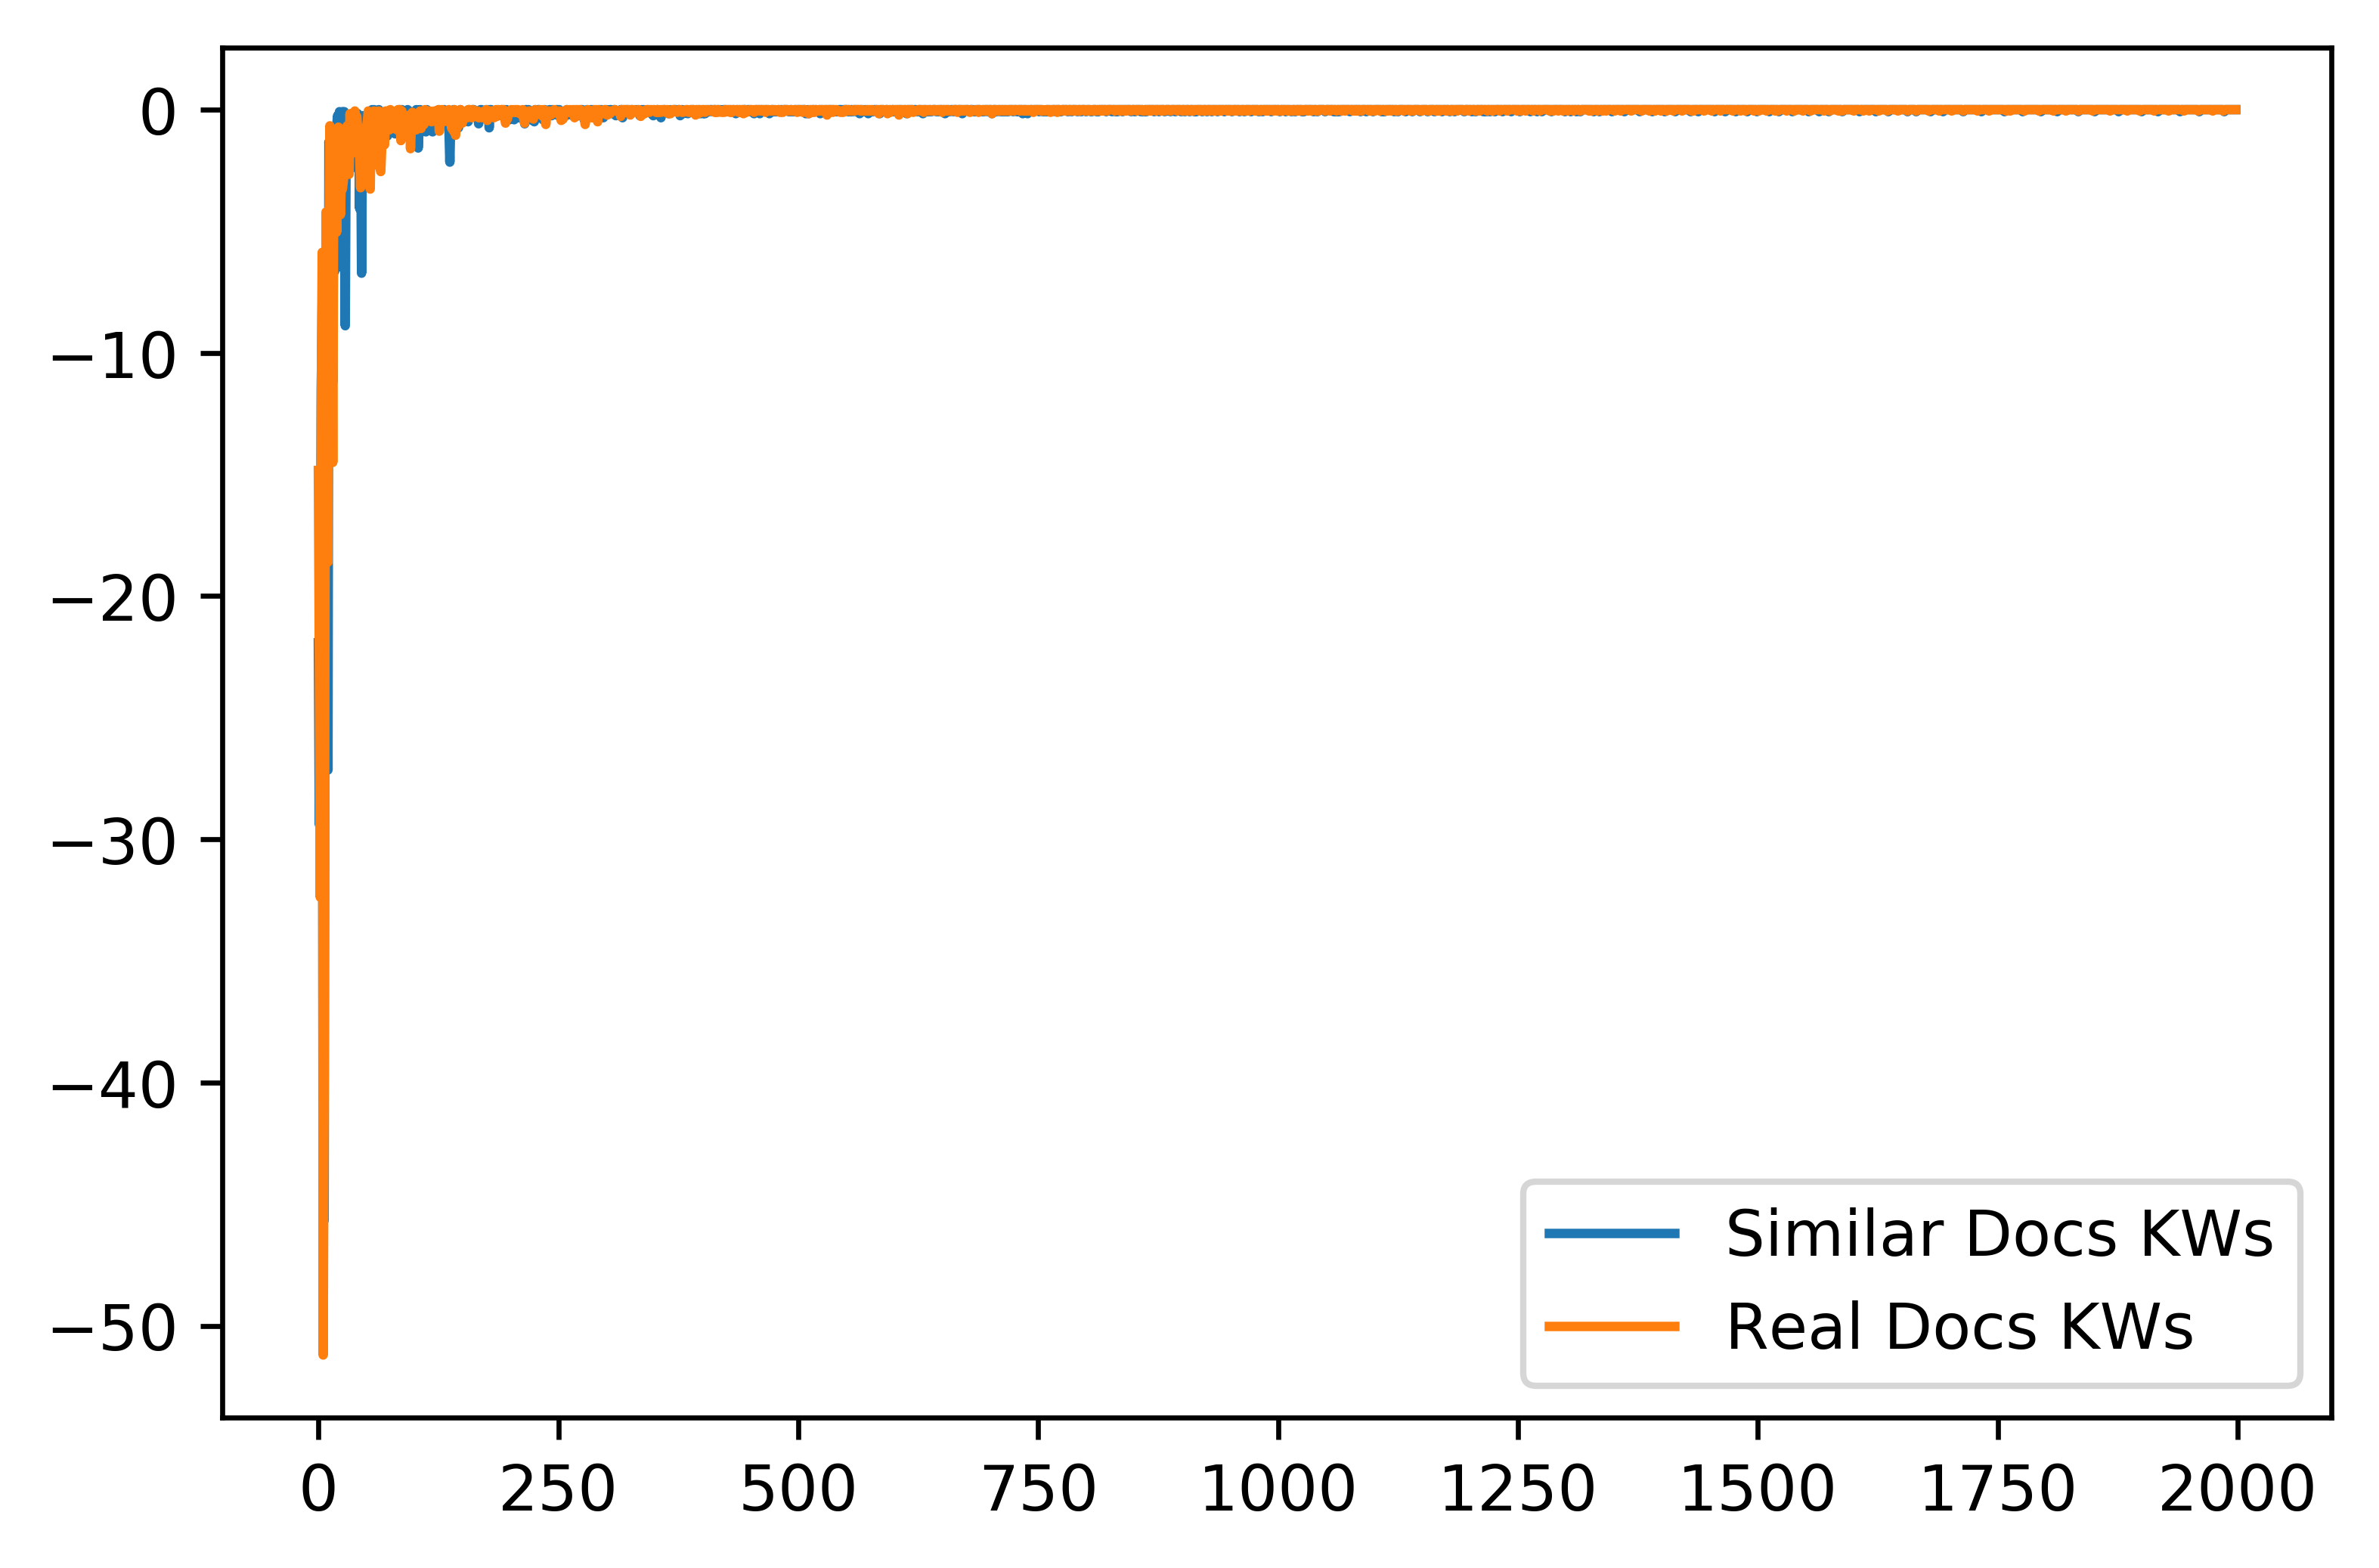

In [23]:
import tensorflow as tf

y_sim = similar_keyword_counts / len(similar_docs)
y_real = real_keyword_counts/ len(stored_docs)

dx = tf.experimental.numpy.diff(
    tf.convert_to_tensor(
        list(range(1,2001)
    ), dtype=tf.float64), n=1, axis=-1
)

dx = 0.001

dy_sim = tf.experimental.numpy.diff(
    y_sim, n=1, axis=-1
) / dx

dy_real = tf.experimental.numpy.diff(
    y_real, n=1, axis=-1
) / dx

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 600
plt.plot(dy_sim, label="Similar Docs KWs")
plt.plot(dy_real, label="Real Docs KWs")
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


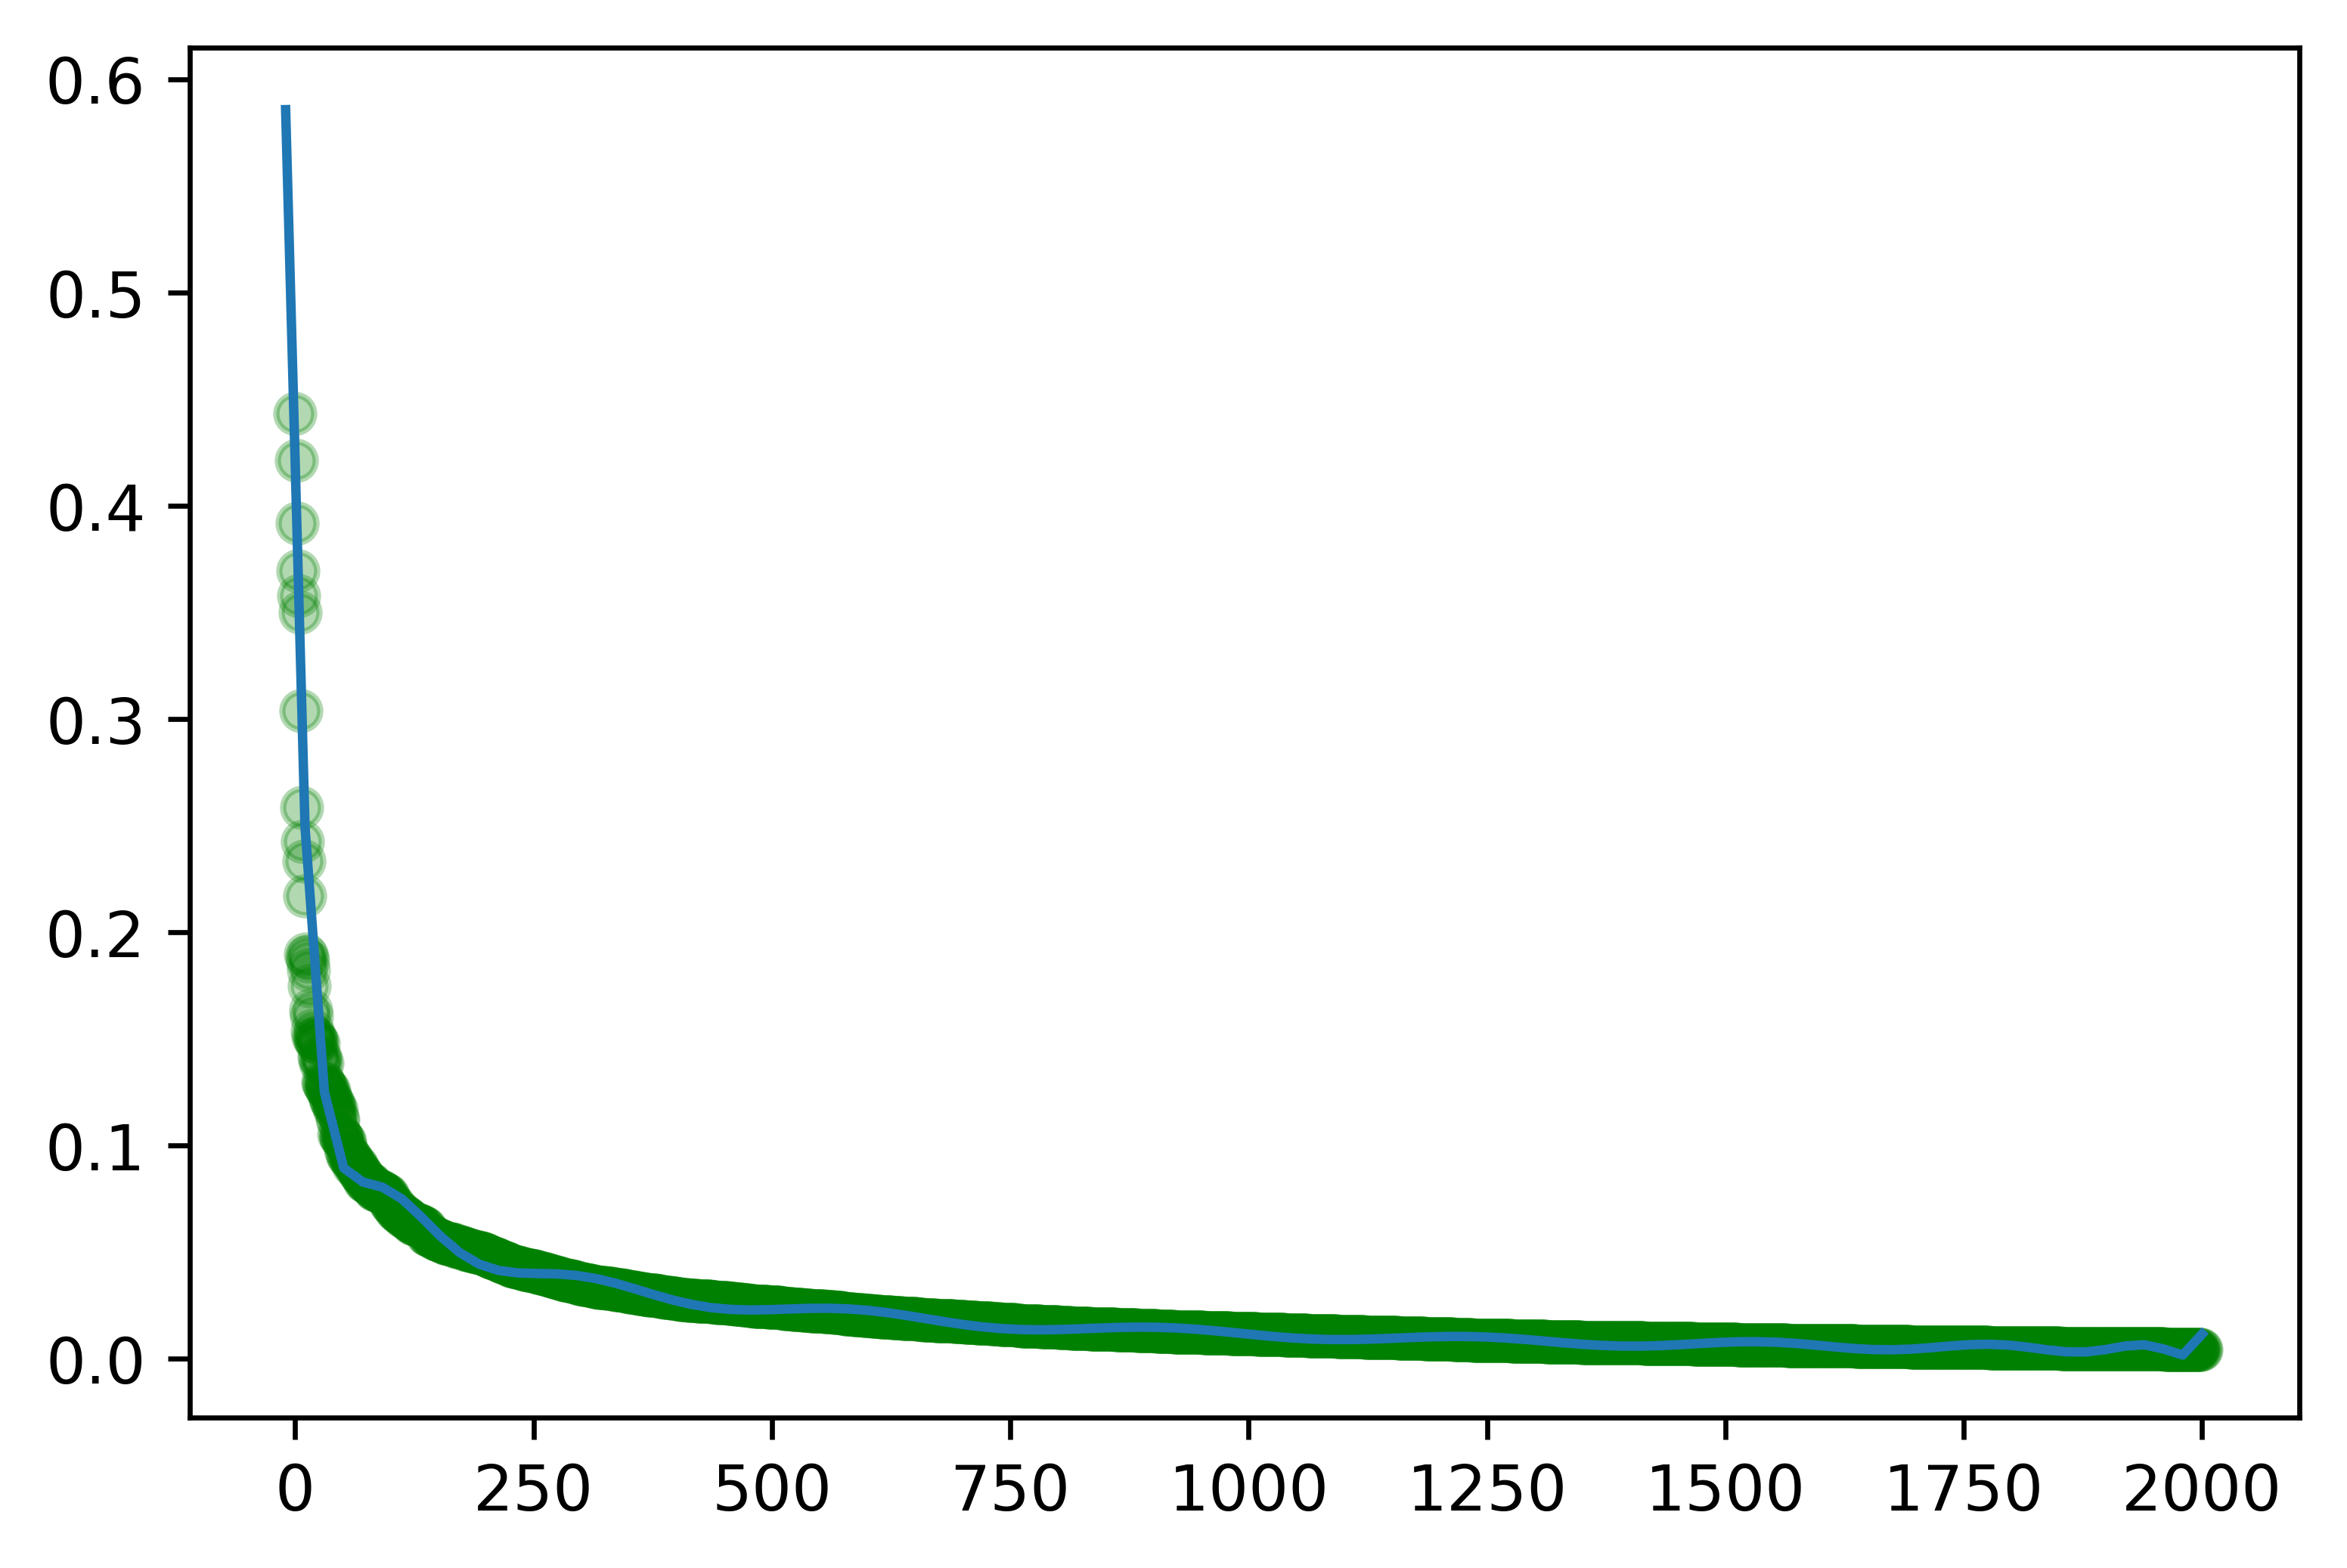

In [38]:
X_train = np.array(list(range(len(y_sim))))

y_sim_poly = np.poly1d(np.polyfit(X_train, y_sim, 20))

myline = np.linspace(-10, 2000, 100)

# plt.scatter(X_train, y_train)
plt.plot(myline, y_sim_poly(myline))
plt.scatter(X_train, y_sim, color='green', alpha=0.3)
plt.show()

In [31]:
from scipy.optimize import curve_fit

def func_log(x, a, b, c):
    """Return values from a log function."""
    return a*np.log2(b+x)+c

def func_log_der(x, a, b, c):
    return a / ((b + x) * np.log(2))

In [32]:
popt, pcov = curve_fit(func_log, X_train, y_sim)
print("a = %s , b = %s, c = %s" % (popt[0], popt[1], popt[2]))

a = -0.02045888117643396 , b = 0.00046553683773366993, c = 0.21691293643825443


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log2
  """


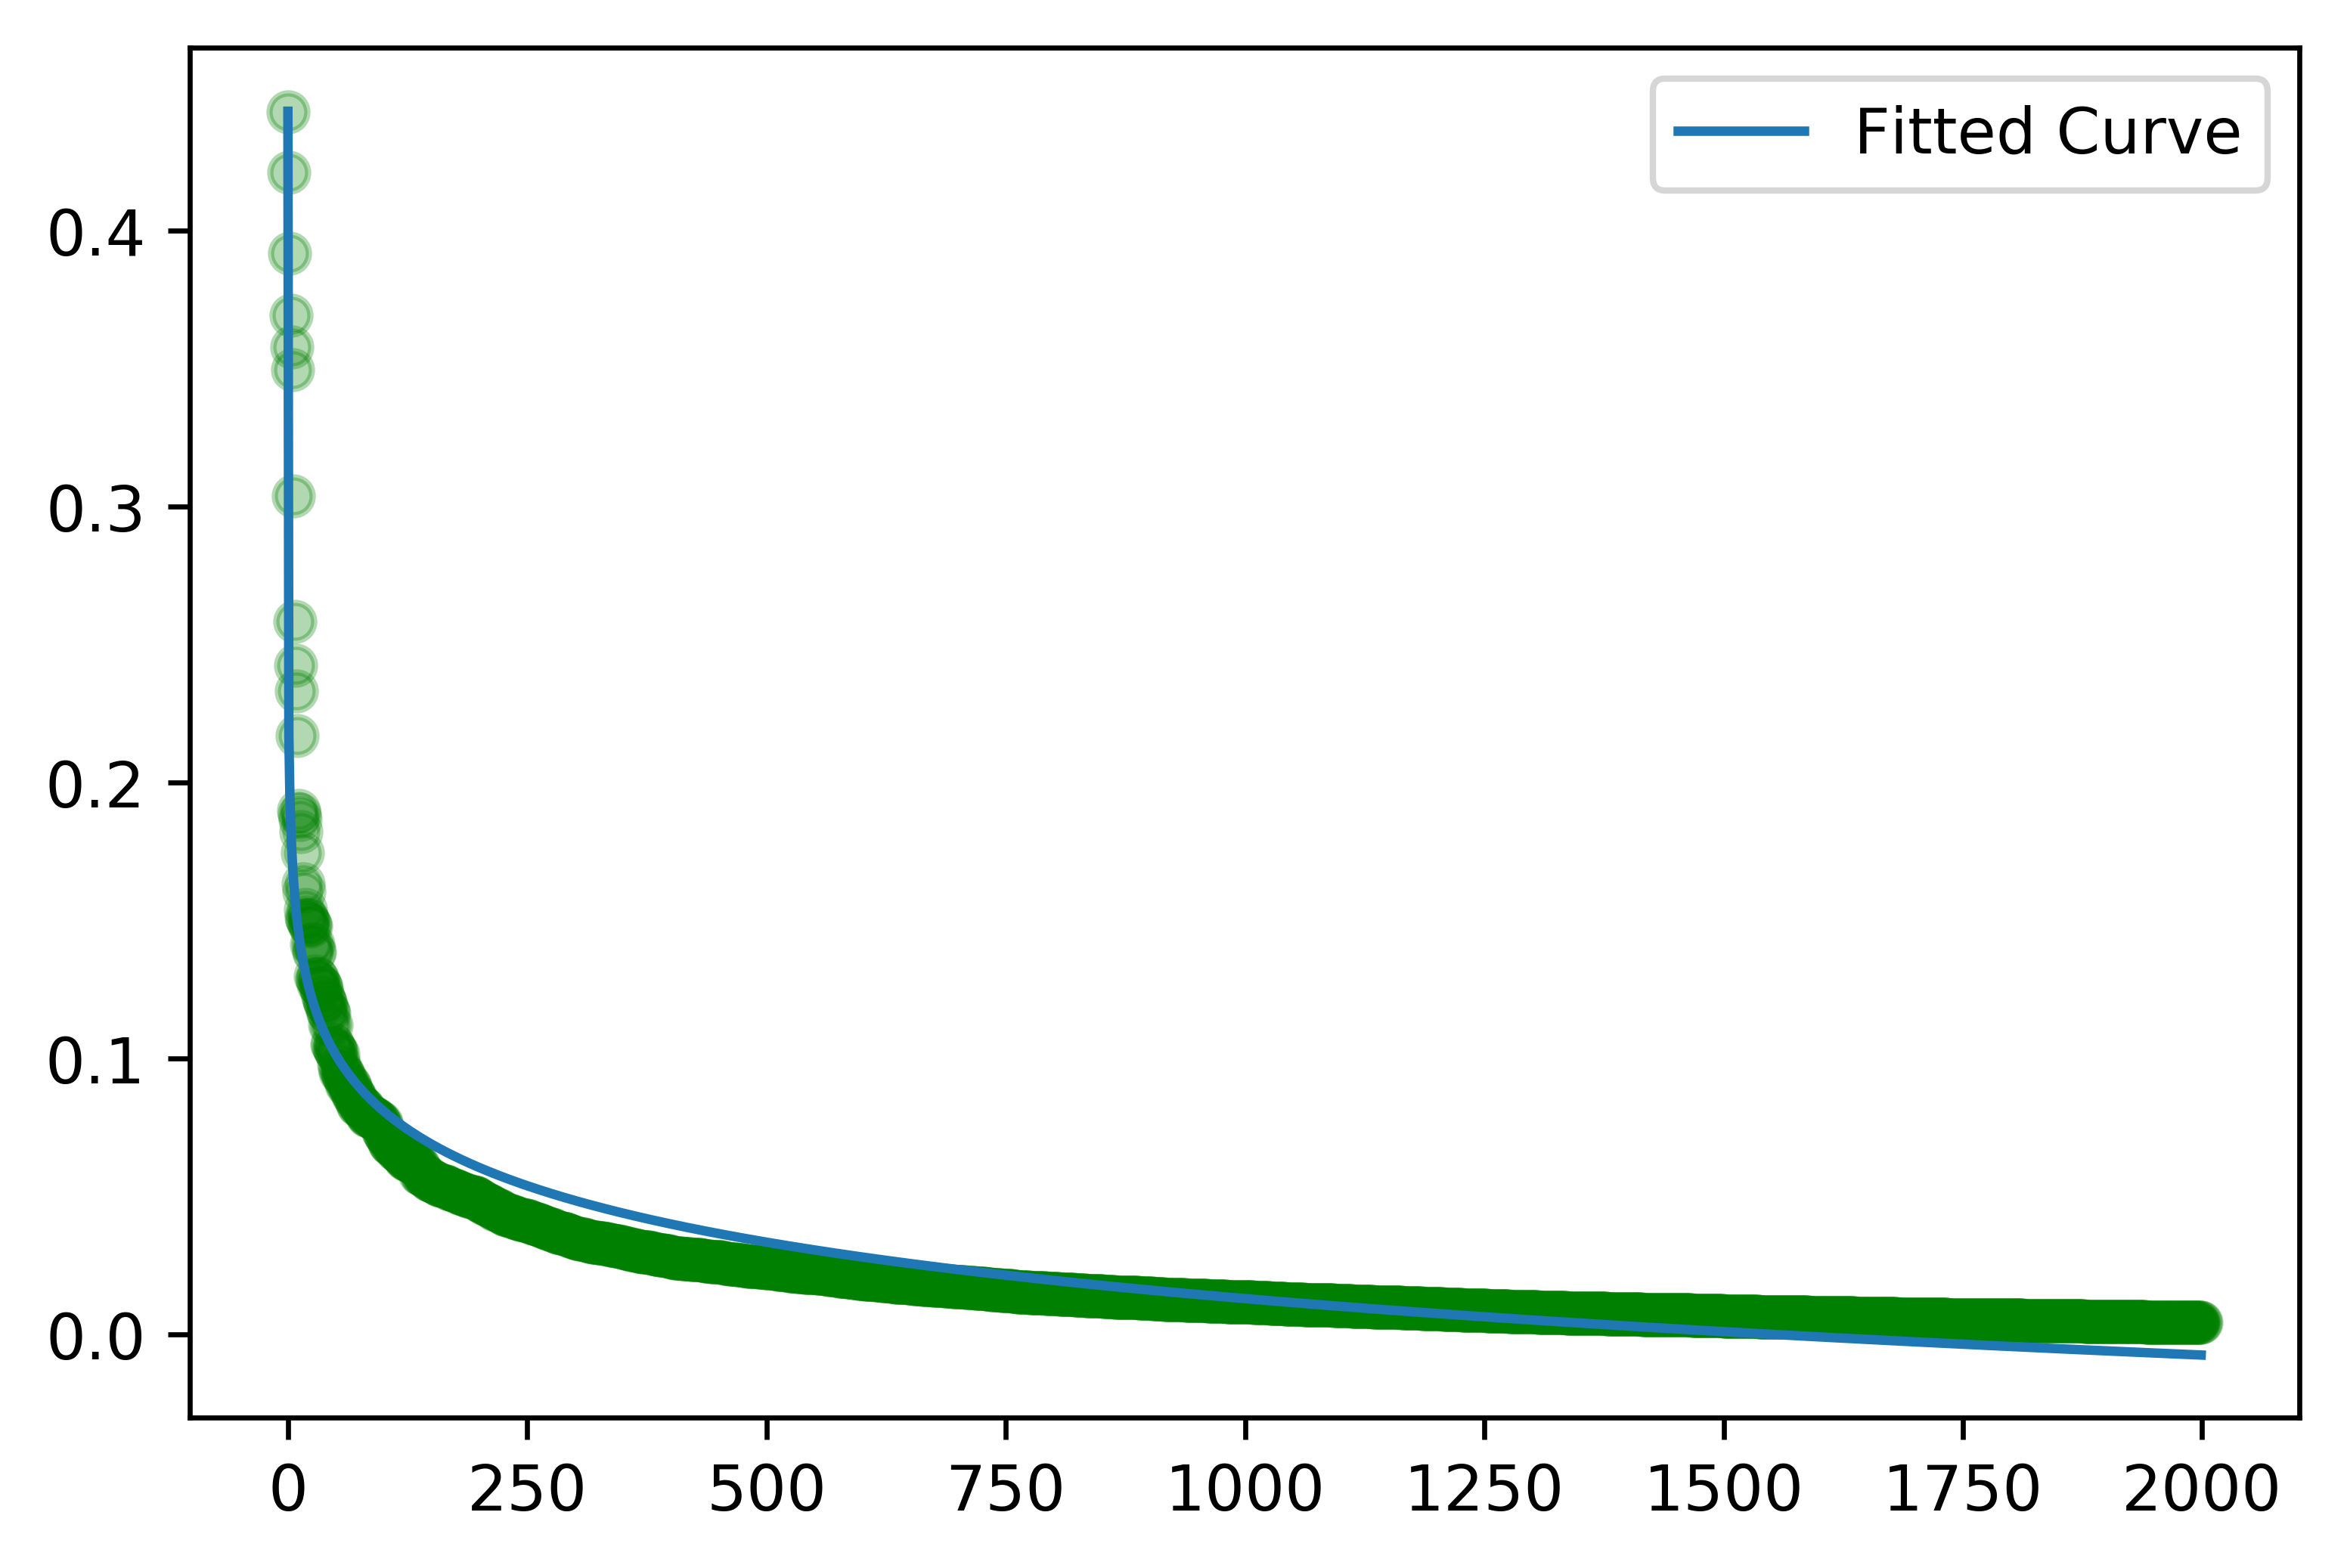

In [33]:
plt.plot(X_train, func_log(X_train, *popt), label="Fitted Curve") #same as line above \/
plt.scatter(X_train, y_sim, color='green', alpha=0.3)

plt.legend()
plt.show()

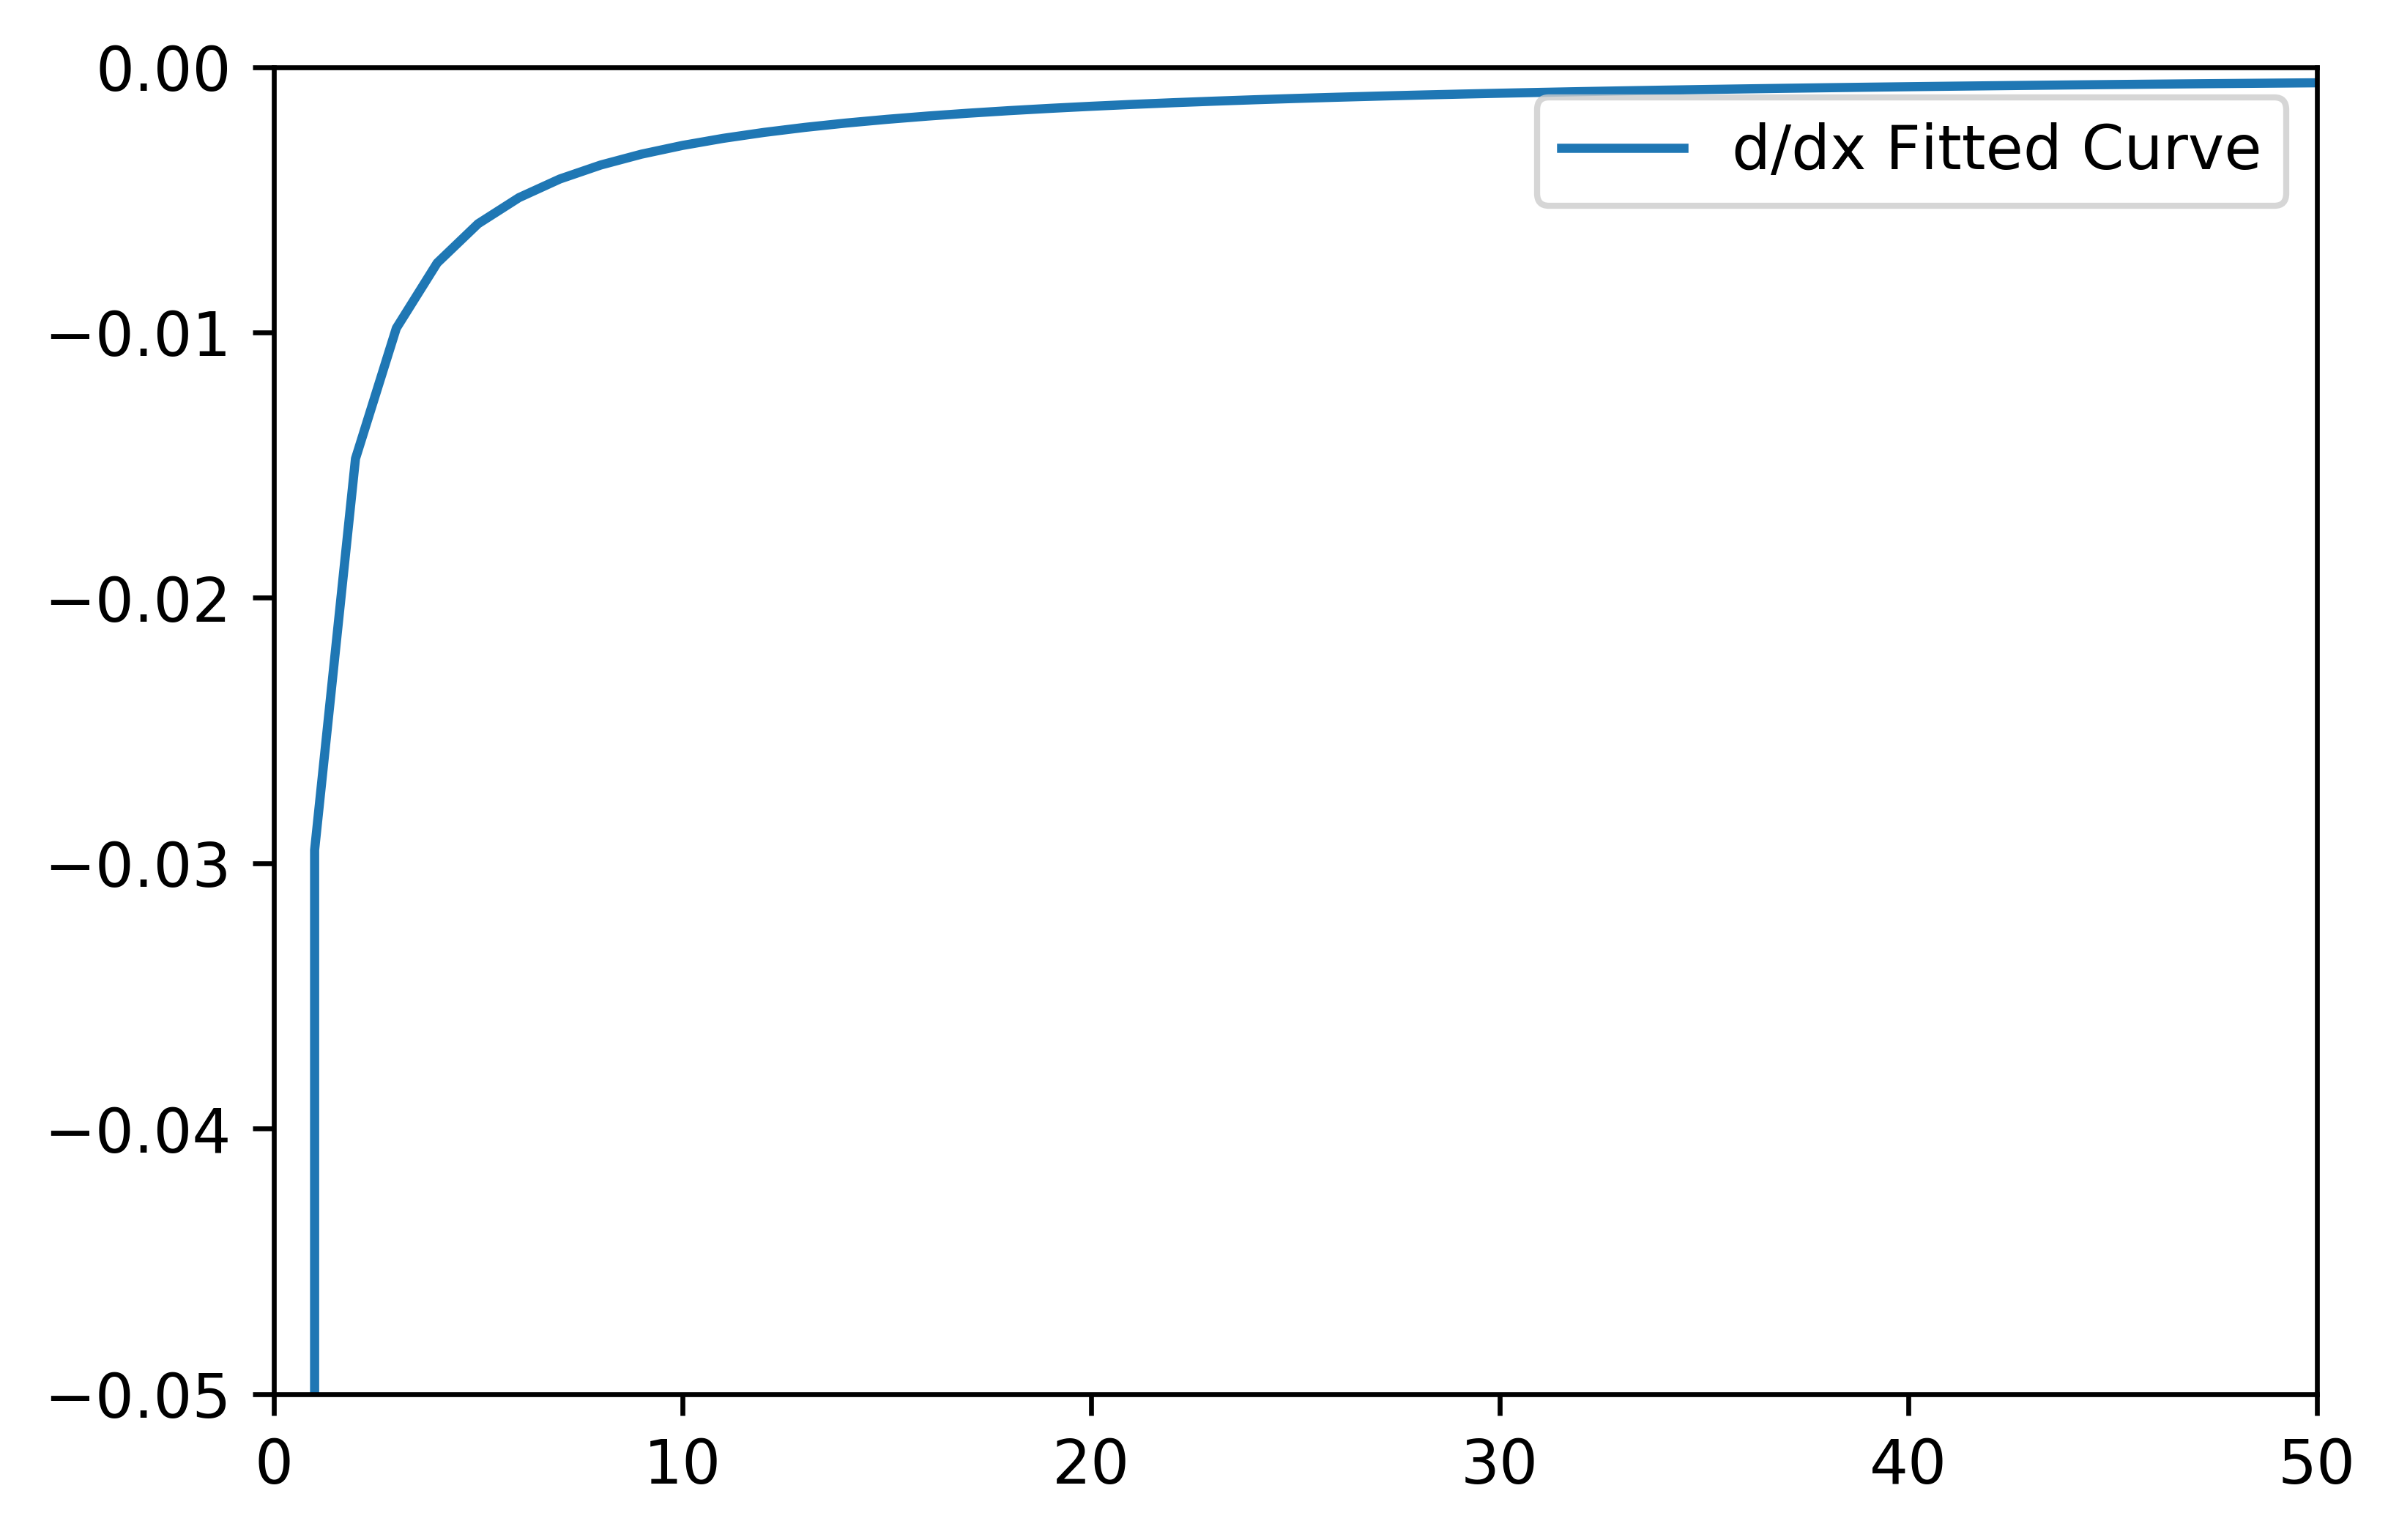

In [41]:
plt.plot(X_train, func_log_der(X_train, *popt), label="d/dx Fitted Curve") #same as line above \/
# plt.scatter(X_train, y_sim, color='green', alpha=0.3)

plt.ylim(bottom=-0.05, top=0)
plt.xlim(left=0, right=50)
plt.legend()
plt.show()